In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
df=pd.read_csv('Agriculture_price_dataset.csv')

In [36]:
df.head(30000)

,STATE,District Name,Market Name,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Price Date
0,Maharashtra,nashik,Lasalgaon(Niphad),Wheat,Maharashtra 2189,FAQ,2172.0,2399.0,2300.0,6/6/2023
1,Maharashtra,satara,Patan,Tomato,Other,FAQ,1000.0,1500.0,1250.0,6/6/2023
2,Uttar Pradesh,mainpuri,Bewar,Potato,Local,FAQ,800.0,820.0,810.0,6/6/2023
3,Rajasthan,chittorgarh,Nimbahera,Wheat,Other,FAQ,2040.0,2668.0,2300.0,6/6/2023
4,Rajasthan,pratapgarh,Pratapgarh,Onion,Other,FAQ,476.0,1043.0,617.0,6/6/2023
...,...,...,...,...,...,...,...,...,...,...
29995,Punjab,sangrur,Dhuri,Onion,Other,FAQ,1000.0,1250.0,1100.0,6/23/2023
29996,Rajasthan,sirohi,Abu Road,Tomato,Other,FAQ,1475.0,1525.0,1500.0,6/23/2023
29997,Punjab,gurdaspur,Dinanagar,Onion,Other,FAQ,1200.0,1500.0,1400.0,6/23/2023
29998,Maharashtra,akola,Patur,Wheat,Maharashtra 2189,FAQ,2000.0,2400.0,2103.0,6/23/2023


In [37]:
df = df.sample(n=30000, random_state=42)


In [38]:
# Q1 = df['Modal_Price'].quantile(0.25)
# Q3 = df['Modal_Price'].quantile(0.75)
# IQR = Q3 - Q1

# lower = Q1 - 1.5 * IQR
# upper = Q3 + 1.5 * IQR

# df = df[(df['Modal_Price'] >= lower) & (df['Modal_Price'] <= upper)]


In [39]:
# df.tail()

In [40]:
df.shape

(30000, 10)

In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
df.drop_duplicates(inplace=True)

In [43]:
df['STATE'].unique()

array(['Uttar Pradesh', 'Gujarat', 'Karnataka', 'Andhra Pradesh',
       'Haryana', 'Maharashtra', 'Kerala', 'Himachal Pradesh',
       'Rajasthan', 'Madhya Pradesh', 'West Bengal', 'Chattisgarh',
       'Punjab', 'Orissa', 'Assam', 'Chhattisgarh', 'Delhi', 'Nagaland',
       'Jammu & Kashmir', ' Punjab', 'Chandigarh', 'Meghalaya', 'Bihar',
       'Jammu and Kashmir', 'Uttrakhand', 'Manipur'], dtype=object)

In [44]:
df['Max_Price'].value_counts()

,count
Max_Price,
1200.0,1425
1000.0,1373
2000.0,1190
1500.0,1103
1600.0,825
...,...
7255.0,1
1072.0,1
8285.0,1


In [45]:
df['Min_Price'].value_counts()

,count
Min_Price,
1000.0,1876
800.0,1292
2000.0,1277
1200.0,1086
1500.0,929
...,...
2420.0,1
2329.0,1
4415.0,1


In [46]:
df['Modal_Price'].value_counts()

,count
Modal_Price,
1000.0,1122
1200.0,1051
2200.0,812
800.0,799
900.0,772
...,...
2845.0,1
1104.0,1
1521.0,1


In [47]:
df['Modal_Price'].unique()

array([1500., 1100., 1125., ..., 4060., 7165., 7880.])

In [48]:
df.isna().sum()

,0
STATE,0
District Name,0
Market Name,0
Commodity,0
Variety,0
Grade,0
Min_Price,0
Max_Price,0
Modal_Price,0
Price Date,0


In [49]:
df['Price Date'] = pd.to_datetime(df['Price Date'], format='mixed', errors='coerce')

df['year'] = df['Price Date'].dt.year
df['month'] = df['Price Date'].dt.month
df['day'] = df['Price Date'].dt.day

df.drop('Price Date', axis=1, inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 64443 to 30018
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE          30000 non-null  object 
 1   District Name  30000 non-null  object 
 2   Market Name    30000 non-null  object 
 3   Commodity      30000 non-null  object 
 4   Variety        30000 non-null  object 
 5   Grade          30000 non-null  object 
 6   Min_Price      30000 non-null  float64
 7   Max_Price      30000 non-null  float64
 8   Modal_Price    30000 non-null  float64
 9   year           30000 non-null  int32  
 10  month          30000 non-null  int32  
 11  day            30000 non-null  int32  
dtypes: float64(3), int32(3), object(6)
memory usage: 2.6+ MB


In [51]:
from sklearn.preprocessing import LabelEncoder

cat_cols = [
    'STATE',
    'District Name',
    'Market Name',
    'Commodity',
    'Variety',
    'Grade'
]

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 64443 to 30018
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE          30000 non-null  int64  
 1   District Name  30000 non-null  int64  
 2   Market Name    30000 non-null  int64  
 3   Commodity      30000 non-null  int64  
 4   Variety        30000 non-null  int64  
 5   Grade          30000 non-null  int64  
 6   Min_Price      30000 non-null  float64
 7   Max_Price      30000 non-null  float64
 8   Modal_Price    30000 non-null  float64
 9   year           30000 non-null  int32  
 10  month          30000 non-null  int32  
 11  day            30000 non-null  int32  
dtypes: float64(3), int32(3), int64(6)
memory usage: 2.6 MB


<Axes: xlabel='Modal_Price', ylabel='Count'>

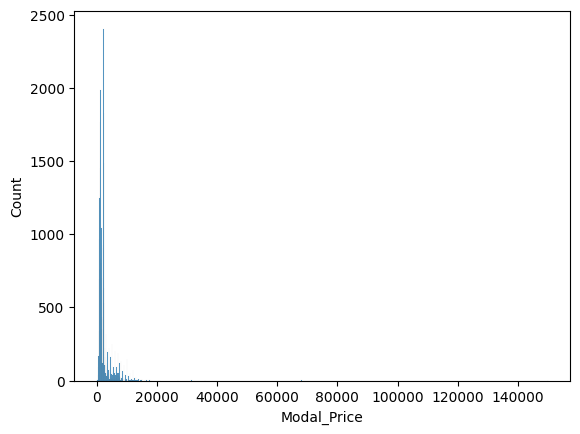

In [53]:
sns.histplot(df['Modal_Price'])

<Axes: xlabel='Min_Price', ylabel='Count'>

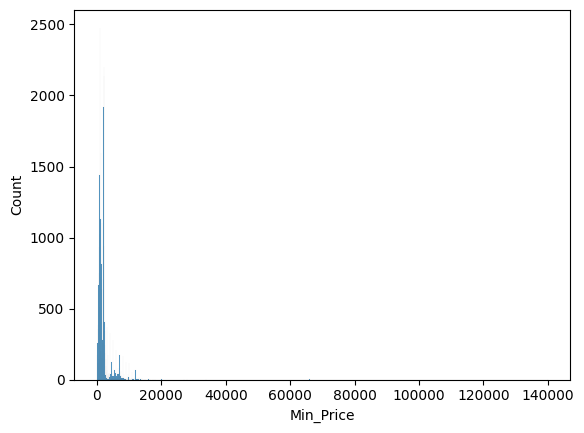

In [54]:
sns.histplot(df['Min_Price'])

<Axes: xlabel='Max_Price', ylabel='Count'>

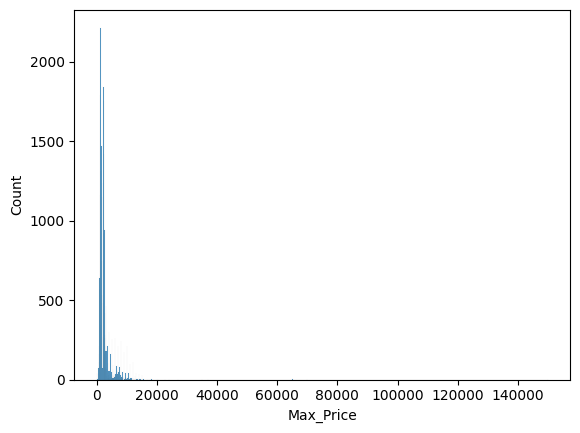

In [55]:
sns.histplot(df['Max_Price'])

<Axes: xlabel='STATE', ylabel='Count'>

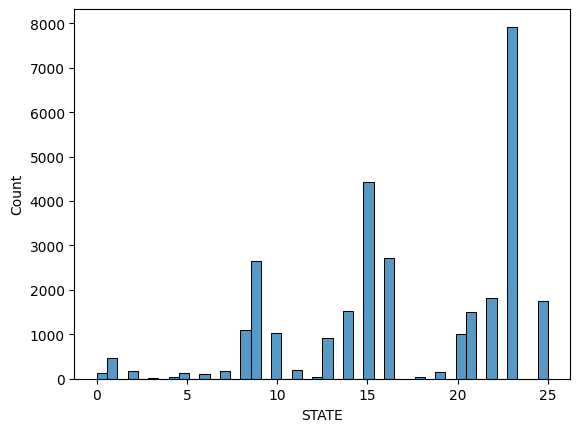

In [56]:
sns.histplot(df['STATE'])

<Axes: xlabel='STATE', ylabel='Modal_Price'>

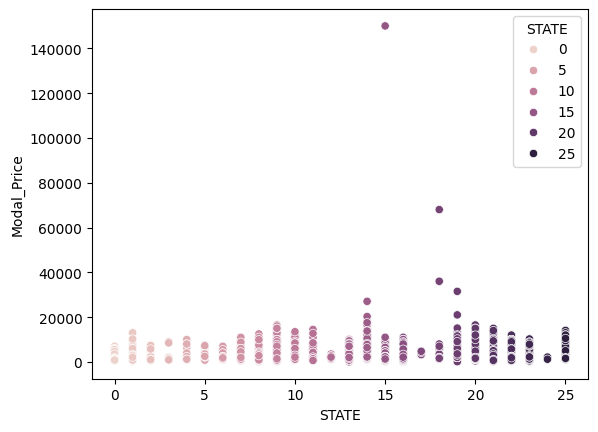

In [57]:
sns.scatterplot(x='STATE', y='Modal_Price', data=df,hue='STATE')

<Axes: xlabel='Market Name', ylabel='Modal_Price'>

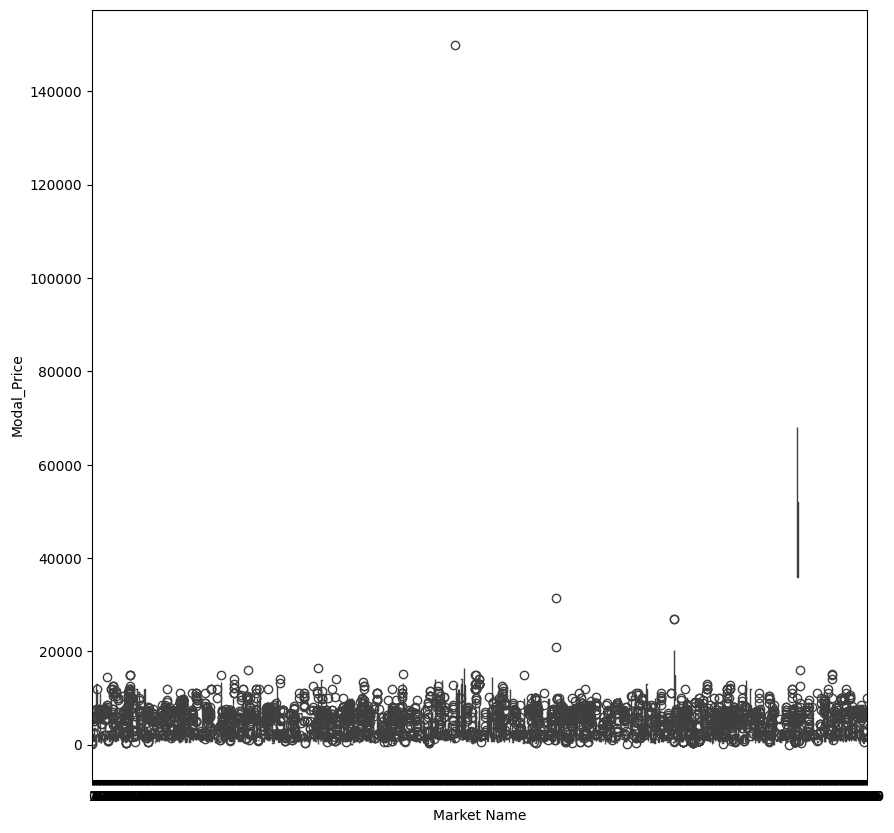

In [58]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Market Name', y='Modal_Price', data=df)

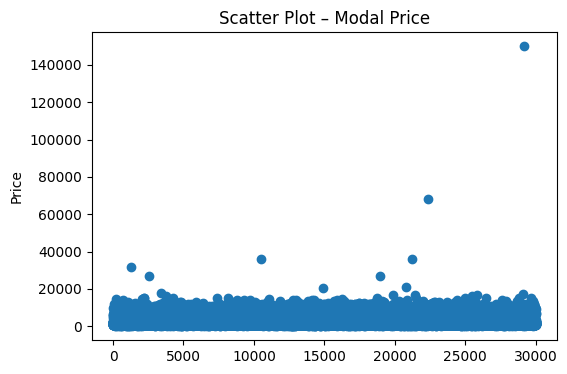

In [59]:
plt.figure(figsize=(6,4))
plt.scatter(range(len(df)), df['Modal_Price'])
plt.title("Scatter Plot – Modal Price")
plt.ylabel("Price")
plt.show()


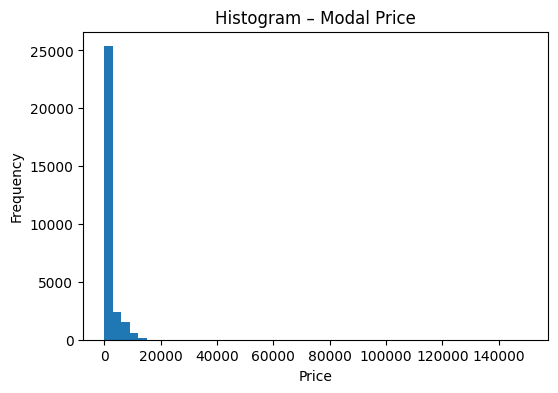

In [60]:
plt.figure(figsize=(6,4))
plt.hist(df['Modal_Price'], bins=50)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram – Modal Price")
plt.show()


In [61]:
X = df.drop('Modal_Price', axis=1)
y = df['Modal_Price']


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
#  for testing
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))


Linear Regression R2: 0.9930836171828851


In [64]:
train_pred = lr.predict(X_train)

from sklearn.metrics import r2_score
# for training
train_r2 = r2_score(y_train, train_pred)
print("Training R2 Score:", train_r2)


Training R2 Score: 0.9872563054785725


In [65]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
# for testing
print("Ridge R2:", r2_score(y_test, y_pred_ridge))


Ridge R2: 0.9930836315893771


In [66]:
train_pred = ridge.predict(X_train)

from sklearn.metrics import r2_score
# for training
train_r2 = r2_score(y_train, train_pred)
print("Training R2 Score:", train_r2)


Training R2 Score: 0.987256304168669


In [67]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [68]:
y_pred = model.predict(X_test)


In [69]:
from sklearn.metrics import r2_score, mean_absolute_error
# for testing
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.956879581809618
MAE: 50.79496398333333


In [70]:
train_pred = model.predict(X_train)

from sklearn.metrics import r2_score
# for training
train_r2 = r2_score(y_train, train_pred)
print("Training R2 Score:", train_r2)

Training R2 Score: 0.9852038761467898


In [71]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
# for test
print("Decision Tree R2:", r2_score(y_test, y_pred_dt))


Decision Tree R2: 0.9584083824540839


In [72]:
train_pred = dt.predict(X_train)

from sklearn.metrics import r2_score
# for training
train_r2 = r2_score(y_train, train_pred)
print("Training R2 Score:", train_r2)

Training R2 Score: 0.9971875913770012


In [73]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=10,
    random_state=50
)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost R2:", r2_score(y_test, y_pred_xgb))


XGBoost R2: 0.9127349812923616


In [74]:
train_pred = xgb.predict(X_train)

from sklearn.metrics import r2_score
# for training
train_r2 = r2_score(y_train, train_pred)
print("Training R2 Score:", train_r2)

Training R2 Score: 0.9993576682158869


In [75]:
print("all model for testing ")
results = {
    "Linear": r2_score(y_test, y_pred_lr),
    "Ridge": r2_score(y_test, y_pred_ridge),
    "DecisionTree": r2_score(y_test, y_pred_dt),
    "RandomForest": r2_score(y_test, y_pred),
    "XGBoost": r2_score(y_test, y_pred_xgb)

}

pd.DataFrame(results.items(), columns=["Model","R2 Score"])


all model for testing 


,Model,R2 Score
0,Linear,0.993084
1,Ridge,0.993084
2,DecisionTree,0.958408
3,RandomForest,0.956880
4,XGBoost,0.912735


In [76]:
print("all model for training ")
results = {
    "Linear": r2_score(y_train, train_pred),
    "Ridge": r2_score(y_train, train_pred),
    "DecisionTree": r2_score(y_train, train_pred),
    "RandomForest": r2_score(y_train, train_pred),
    "XGBoost":  r2_score(y_train, train_pred)

}

pd.DataFrame(results.items(), columns=["Model","R2 Score"])

all model for training 


,Model,R2 Score
0,Linear,0.999358
1,Ridge,0.999358
2,DecisionTree,0.999358
3,RandomForest,0.999358
4,XGBoost,0.999358


In [77]:
import pickle

with open('agriculture_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)
